In [1]:
# Import libraries
import pandas as pd

# Load dataset
data_path = "../data/carclaims.csv"
df = pd.read_csv(data_path)

# Preview dataset
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [3]:
print(f"Dataset shape: {df.shape}")
print(f"Dataset columns: {df.columns.tolist()}")

Dataset shape: (15420, 33)
Dataset columns: ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year', 'BasePolicy', 'FraudFound']


In [4]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

In [5]:
df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days:Policy-Accident    object
Days:Policy-Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange-Claim     object
NumberOfCars            object
Year                     int64
BasePolicy              object
FraudFou

In [6]:
df['FraudFound'].value_counts(normalize=True)

FraudFound
No     0.940143
Yes    0.059857
Name: proportion, dtype: float64

Matplotlib is building the font cache; this may take a moment.


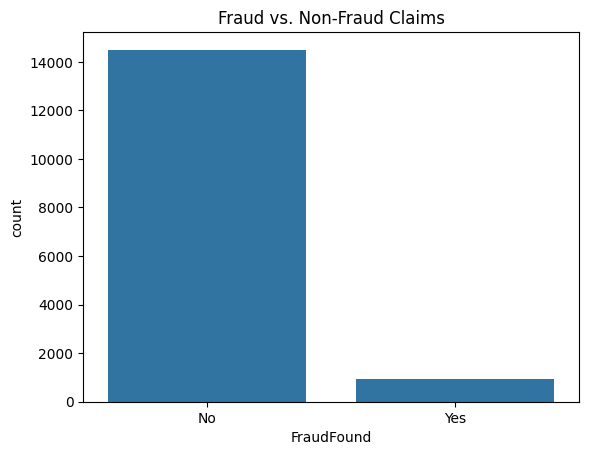

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='FraudFound', data=df)
plt.title('Fraud vs. Non-Fraud Claims')
plt.show()

In [8]:
for col in ['Sex', 'MaritalStatus', 'Fault', 'VehiclePrice', 'PoliceReportFiled']:
    print(f"{col}: {df[col].unique()}")

Sex: ['Female' 'Male']
MaritalStatus: ['Single' 'Married' 'Widow' 'Divorced']
Fault: ['Policy Holder' 'Third Party']
VehiclePrice: ['more than 69,000' '20,000 to 29,000' '30,000 to 39,000'
 'less than 20,000' '40,000 to 59,000' '60,000 to 69,000']
PoliceReportFiled: ['No' 'Yes']


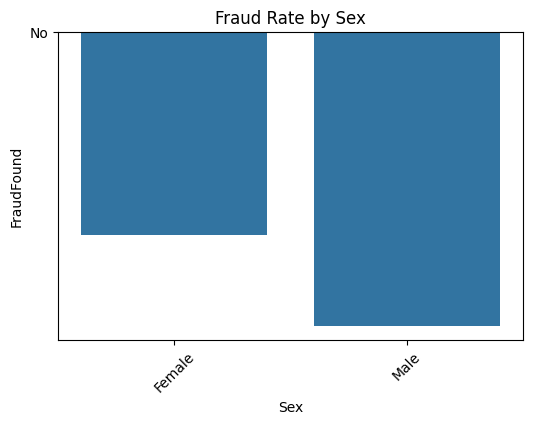

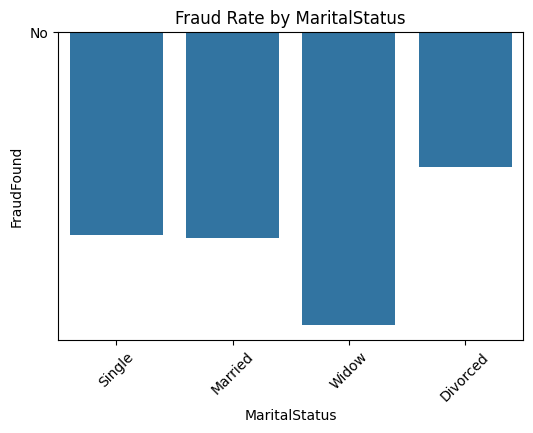

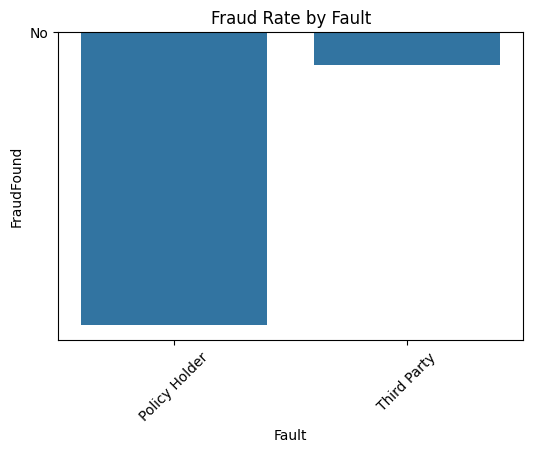

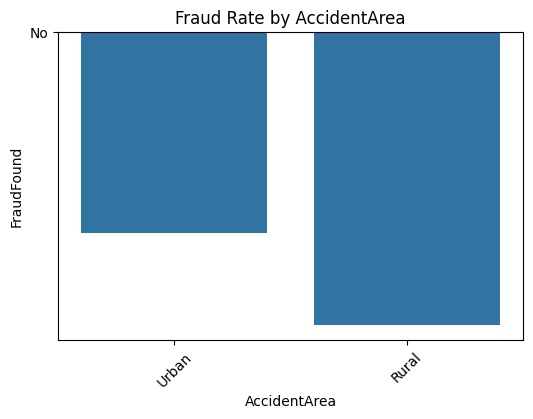

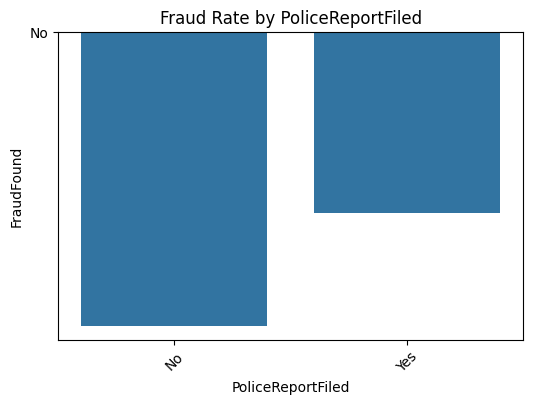

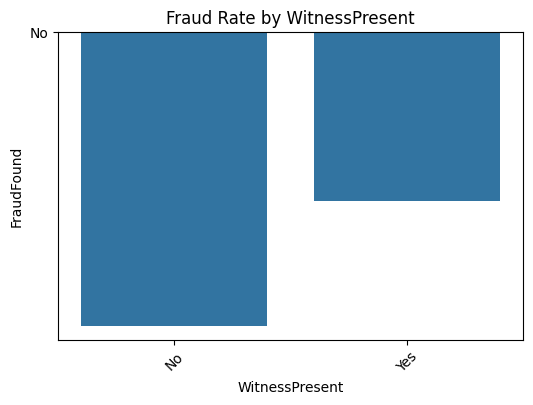

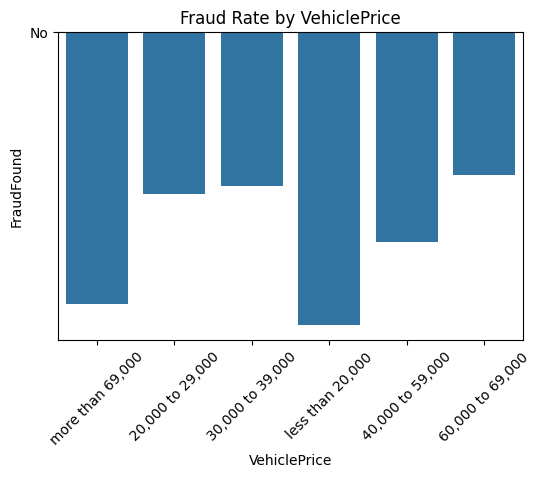

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['Sex', 'MaritalStatus', 'Fault', 'AccidentArea', 'PoliceReportFiled', 'WitnessPresent', 'VehiclePrice']

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='FraudFound', data=df, errorbar=None)
    plt.title(f'Fraud Rate by {col}')
    plt.xticks(rotation=45)
    plt.show()

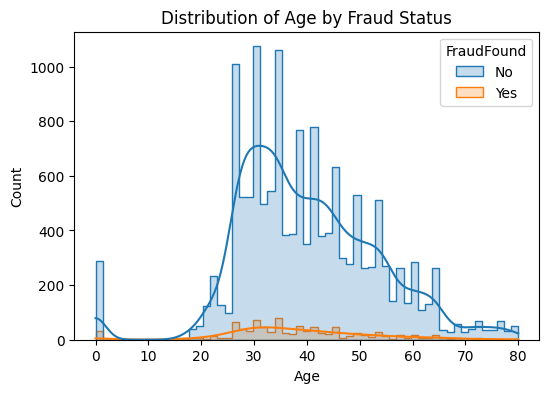

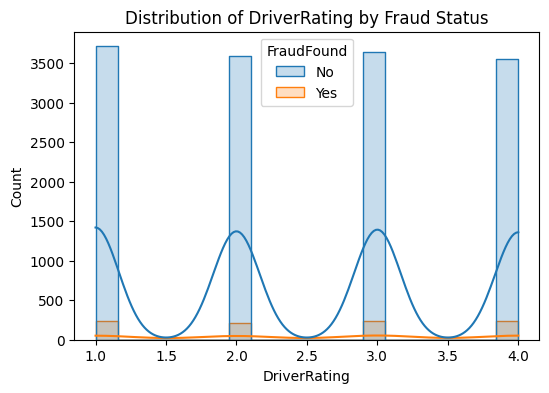

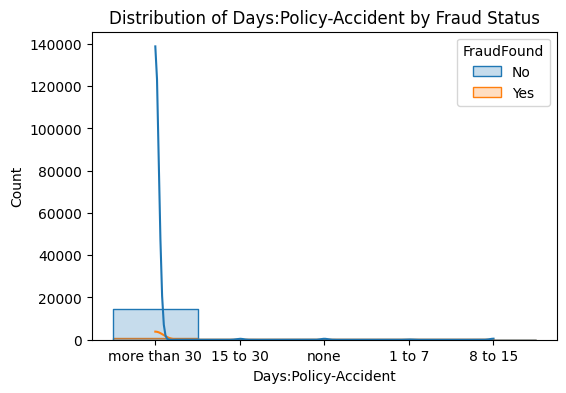

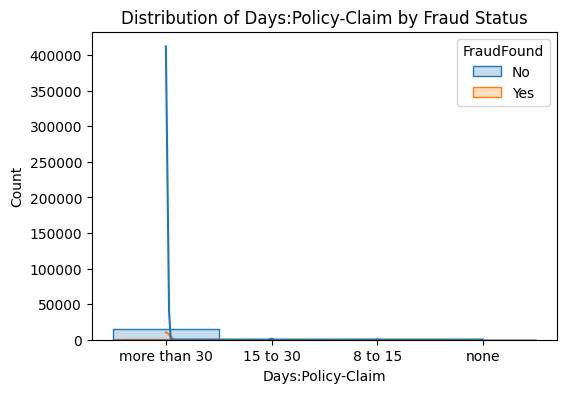

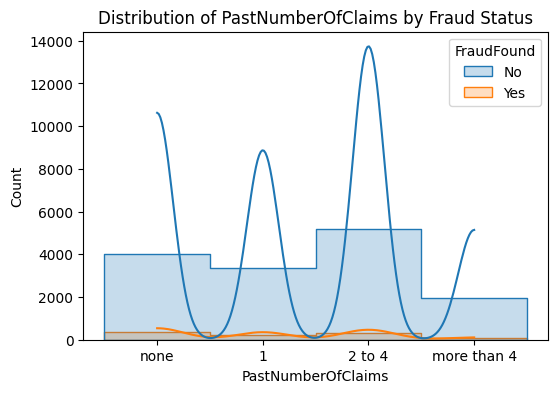

In [11]:
numerical_features = ['Age', 'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims']

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='FraudFound', kde=True, element="step")
    plt.title(f'Distribution of {col} by Fraud Status')
    plt.show()

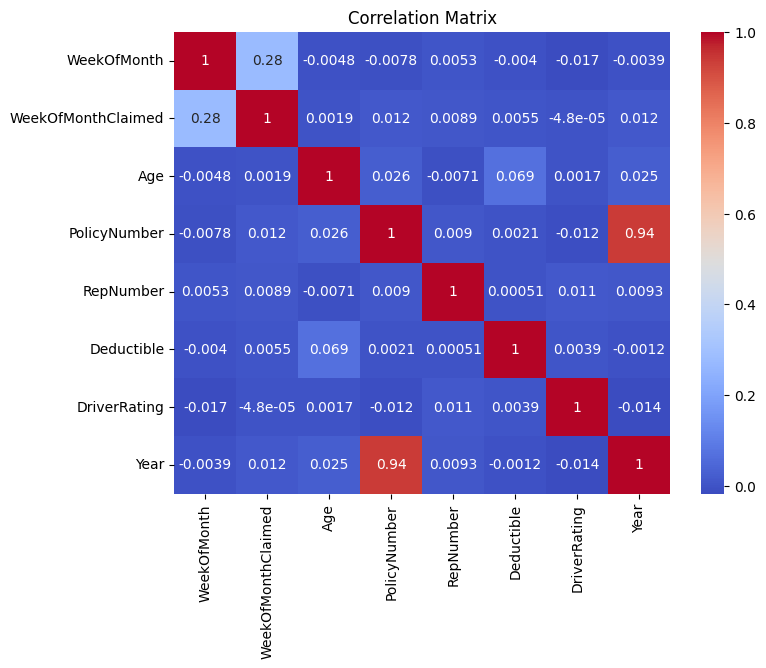

In [12]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()